In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('./data/concrete.csv')

In [3]:
df.head()

,Unnamed: 0,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,2,332.5,142.5,0.0,228.0,NaN,932.0,594.0,270,40.27
3,3,332.5,142.5,0.0,228.0,NaN,932.0,594.0,365,41.05
4,4,198.6,132.4,0.0,192.0,NaN,978.4,825.5,360,44.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1030 non-null   int64  
 1   Cement                         1030 non-null   float64
 2   Blast Furnace Slag             1030 non-null   float64
 3   Fly Ash                        1030 non-null   float64
 4   Water                          1030 non-null   float64
 5   Superplasticizer               651 non-null    float64
 6   Coarse Aggregate               1030 non-null   float64
 7   Fine Aggregate                 1030 non-null   float64
 8   Age                            1030 non-null   object 
 9   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 80.6+ KB


In [5]:
df.describe()

,Unnamed: 0,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,651.000000,1030.000000,1030.000000,1030.000000
mean,514.500000,281.167864,73.895825,54.188350,181.567282,9.816897,972.918932,773.580485,35.817961
std,297.479691,104.506364,86.279342,63.997004,21.354219,4.580328,77.753954,80.175980,16.705742
min,0.000000,102.000000,0.000000,0.000000,121.800000,1.700000,801.000000,594.000000,2.330000
25%,257.250000,192.375000,0.000000,0.000000,164.900000,6.950000,932.000000,730.950000,23.710000
50%,514.500000,272.900000,22.000000,0.000000,185.000000,9.400000,968.000000,779.500000,34.445000
75%,771.750000,350.000000,142.950000,118.300000,192.000000,11.600000,1029.400000,824.000000,46.135000
max,1029.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,82.600000


In [6]:
df.describe(include='O')

,Age
count,1030
unique,15
top,28
freq,424


In [7]:
df.shape

(1030, 10)

## Data Cleaning

In [8]:
df['Age'].value_counts()

Age
28      424
3       134
7       126
56       91
14       62
90       54
100      52
180      26
91       22
365      14
270      13
360       6
120       3
1         2
'28'      1
Name: count, dtype: int64

There is a value that is a string in the age column, which should be an integer column. 

In [9]:
df['Age'] = df['Age'].str.replace("'", "")

In [10]:
df['Age'] = df['Age'].astype('int')

In [11]:
df.dtypes

Unnamed: 0                         int64
Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                                int64
Concrete compressive strength    float64
dtype: object

Ok, the age column is now as it should be, integers. 

The column Unnamed: 0 seems to be an index column, which we don't need, so we will drop it. 

In [12]:
df = df.drop(columns=['Unnamed: 0'])

In [13]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,NaN,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,NaN,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,NaN,978.4,825.5,360,44.30


There seem to be some missing values in Superplasticizer, so let's look more at that column. 

In [14]:
df.isna().sum()

Cement                             0
Blast Furnace Slag                 0
Fly Ash                            0
Water                              0
Superplasticizer                 379
Coarse Aggregate                   0
Fine Aggregate                     0
Age                                0
Concrete compressive strength      0
dtype: int64

<Axes: xlabel='Superplasticizer', ylabel='Count'>

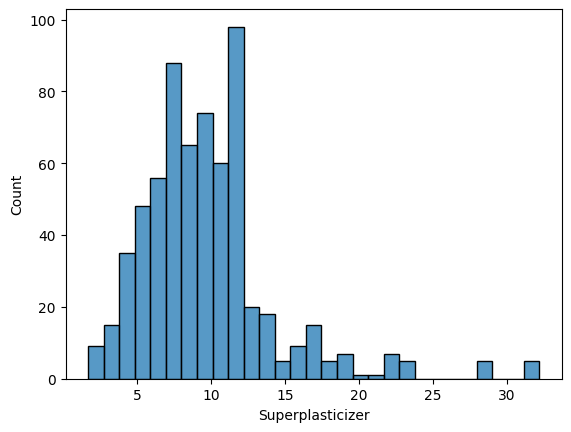

In [15]:
sns.histplot(data=df, x='Superplasticizer')

<Axes: xlabel='Superplasticizer'>

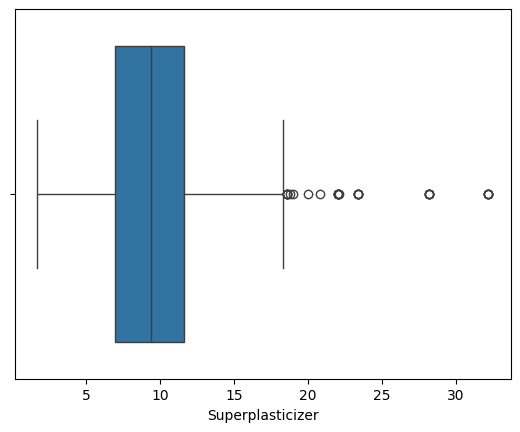

In [16]:
sns.boxplot(data=df, x='Superplasticizer')

It seems that any missing values should be 0s, so we will impute the missing values with 0. 

In [17]:
df['Superplasticizer'] = df['Superplasticizer'].fillna(0)

<Axes: xlabel='Superplasticizer', ylabel='Count'>

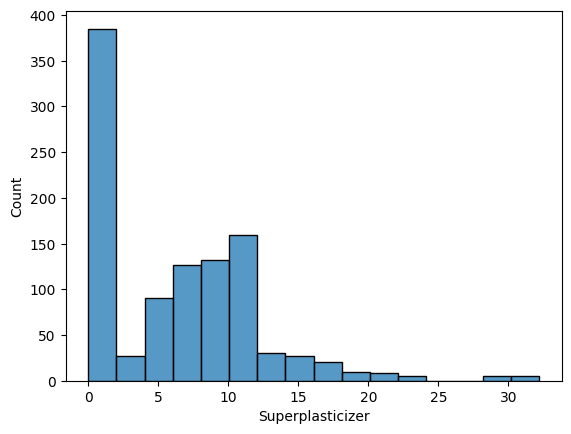

In [18]:
sns.histplot(data=df, x='Superplasticizer')

<Axes: xlabel='Superplasticizer'>

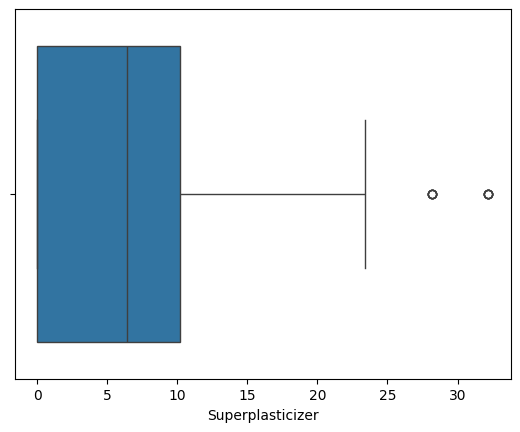

In [19]:
sns.boxplot(data=df, x='Superplasticizer')

In [20]:
df.isna().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

After filling in the missing values with 0s, the number of outliers we have seems to have reduced to 2, and the upper and lower boundries of the boxplot have also changed from 0 to just under 20 to not having a lower bound (no negatives) and an upper bound of around 23/24.

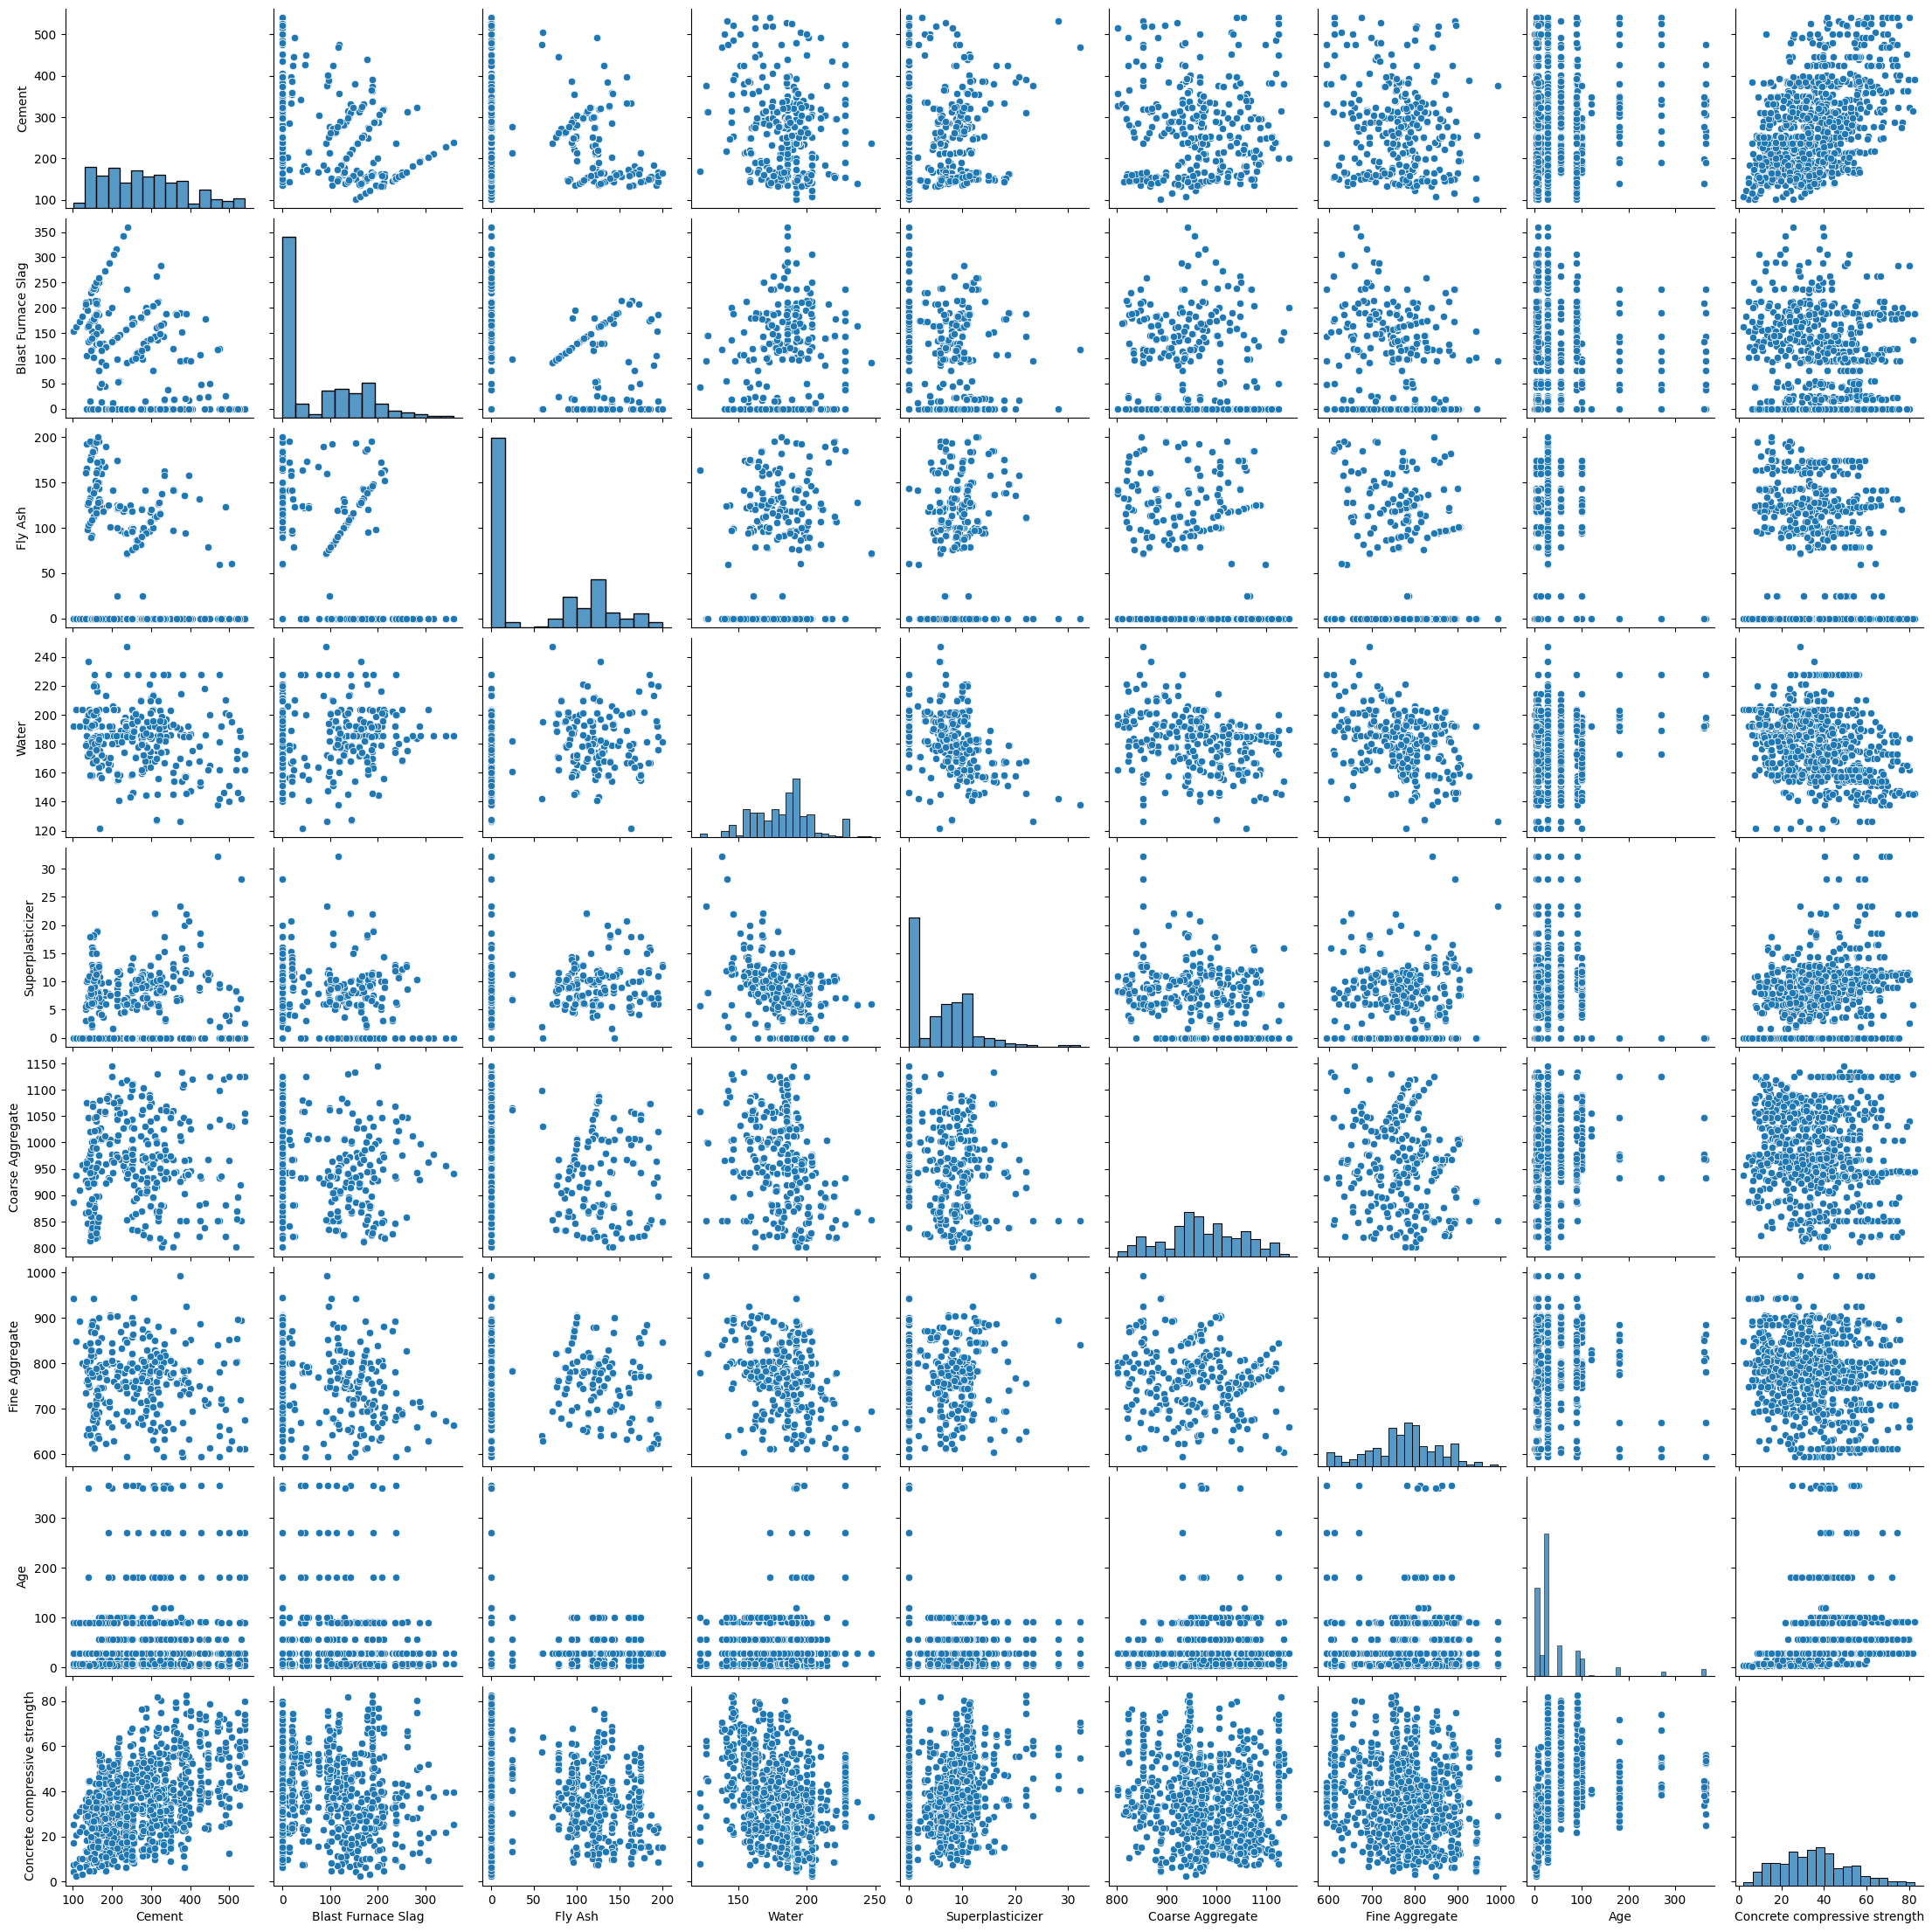

In [21]:
sns.pairplot(data=df)

In the above pairplot, we can see that columns like `Blast Furnace Slag`, `Fly Ash`, and `Superplasticizer` all have alot of zeros, noted by the large bar at the beginning of their histograms and in the scatterplots. 

There also does not seem to be any noteworthy outliers. Even so, as we only have 1030 rows, we don't want to remove too many rows, so any outliers will remain. 

We can also see that the scatterplots of almost everything is sporadic.

Let's take a look at a heatmap of the correlation coefficients. 

<Axes: >

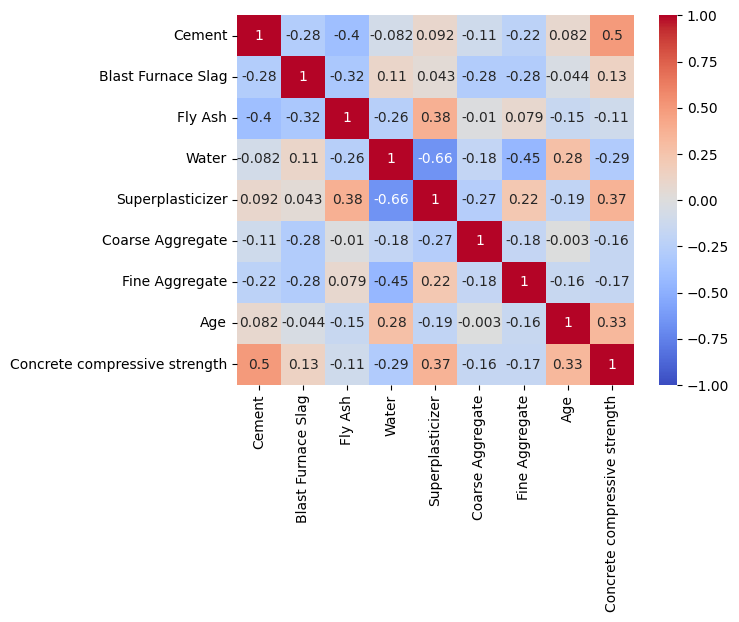

In [22]:
sns.heatmap(data=df.corr(),
vmin=-1,
vmax=1,
cmap='coolwarm',
annot=True)

First thing I notice here is that there are a lot of negative correlation coefficents. THere are some positive ones, but negative dominates. 

Let's dive deeper into this data with EDA. 

## Exploratory Data Analysis

### Questions 

- How do Superplasticizer and Water relate to each other?
- How do Fine Aggregate and Water relate to each other?
- How do Cement and Concrete Compressive Strength relate to each other?
- How do Coarse and Fine Aggregate relate to each other?
- How do Age and Concrete Compressive Strength relate to each other?

### How do Superplasticizer and Water relate to each other?

Text(0.5, 1.0, 'Correlation between Superplasticizer and Water (-0.66)')

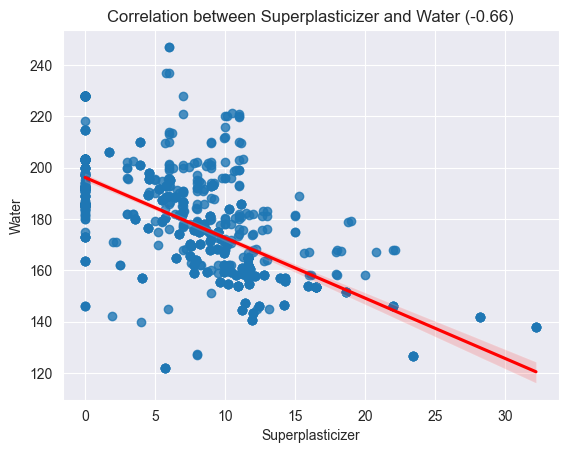

In [30]:
sns.regplot(data=df, x='Superplasticizer', y='Water', line_kws={'color': 'red'})
plt.title("Correlation between Superplasticizer and Water (-0.66)")

From the above regression plot, we see a moderate to strong negative correlation between Superplasticizer and Water. This means that the most Superplasticizer used in the concrete, the less water is used. 

### How do Fine Aggregate and Water relate to each other?

Text(0.5, 1.0, 'Correlation between Fine Aggregate and Water (-0.45)')

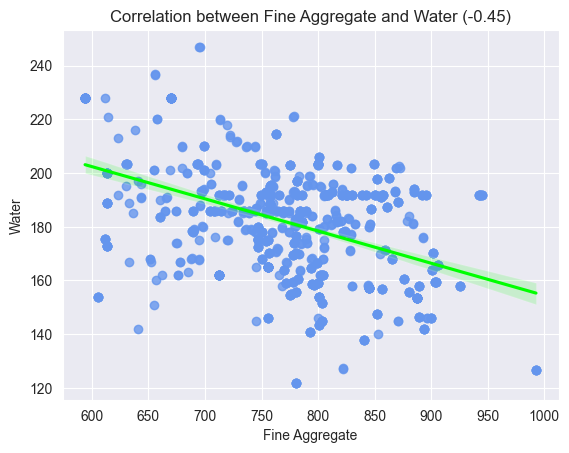

In [31]:
sns.regplot(data=df, x='Fine Aggregate', y='Water', color='cornflowerblue', line_kws={'color': 'lime'})
plt.title("Correlation between Fine Aggregate and Water (-0.45)")

We can see the same thing here with Fine Aggregate and Water, where the more Fine Aggregate used means less Water. The correlation coefficient here is -0.45.

### How do Cement and Concrete Compressive Strength relate to each other?

Text(0.5, 1.0, 'Correlation between Cement and Concrete compressive strength (0.5)')

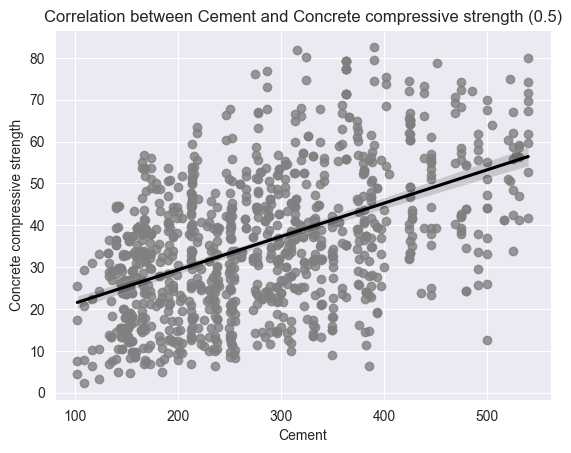

In [35]:
sns.regplot(data=df, x='Cement', y='Concrete compressive strength', color='gray', line_kws={'color': 'black'})
plt.title("Correlation between Cement and Concrete compressive strength (0.5)")

Here, we see a positive correlation between Cement and the Concrete Compressive Strength (which is our target variable). The correlation being positive means that as the kg of Cement increases, so does the Concrete Compressive Strength. The coefficient is 0.5, which is a moderate correlation. 

### - How do Coarse and Fine Aggregate relate to each other?

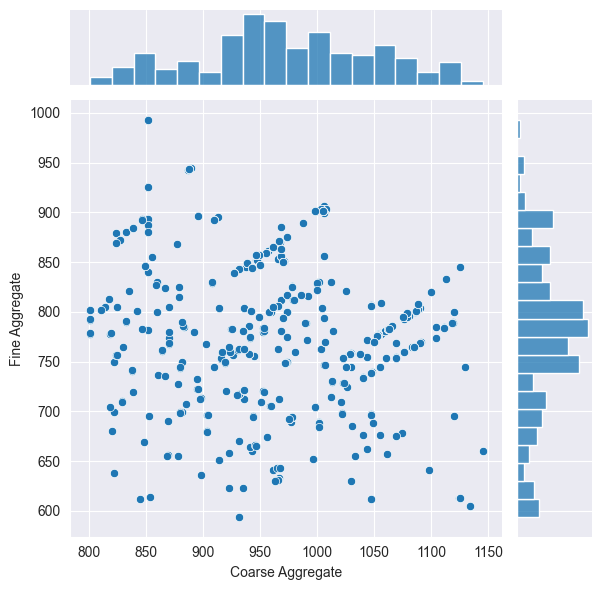

In [36]:
sns.jointplot(data=df, x='Coarse Aggregate', y='Fine Aggregate')

In the above jointplot, we see the distribution of both aggregates as well as a scatter plot between the two. There does not seem to be too much of a correlation between the two. 

## Add another plot here

In [37]:
df.to_csv('./data/cleaned_concrete.csv', index=False)